In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%ls
## Import dataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset

Ads_CTR_Optimisation.csv  upper_confidence_bound.ipynb
random_selection.py       upper_confidence_bound.py
random_selection.R        upper_confidence_bound.R


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


Total reward in case of random ad selection = 1286


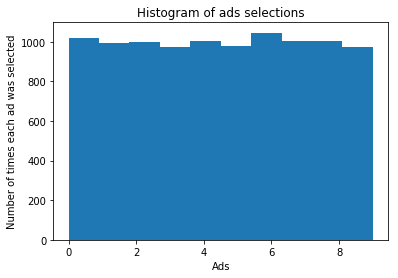

In [2]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

#print(ads_selected)
print("Total reward in case of random ad selection = {}".format(total_reward))

"""I ran this random algo instead of UCB but the reward never exceeded, roughly range of (1000-1300)"""
"""LET'S SEE IF UCB BEATS RANDOM SELECTION, IN NEXT SECTION"""



# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()



In [32]:
# Iplementing UCB
import math

d = 10    # number of arms
N = 10000
ads_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    for i in range(0, d):
        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])    # here, log(n+1) is taken, because indices begin at 0 in python
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400    # to ensure ad i, is selected in first i = 10 rounds

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n,ad]    # notice the difference between indices for a pandas dataset and a python array
    sums_of_rewards[ad] += reward
    total_reward += reward
    
print("Total reward in case of UCB ad selection = {}".format(total_reward))
# as can be seen, total reward is almost doubled by using UCB algo
print(ads_selected)
# as can be seen, ad at index 4 is the last and best ad


Total reward in case of UCB ad selection = 2178
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 

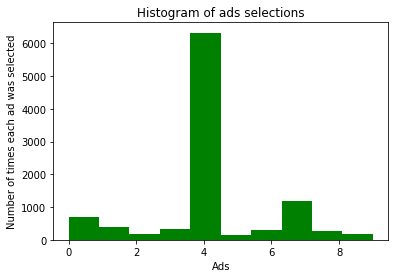

In [31]:
# Visualizing the results
plt.hist(ads_selected, color = 'green')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()